In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import math

# Lista de caminhos das imagens
caminhos_imagens = [
    "/content/AcademiaSaudavel.jpg",
    "/content/ComidaSaudavel2.jpg",
    "/content/ExercicioSaudavel.jpeg",
    "/content/ExercicioSaudavel2.jpg",
    "/content/comidasaudavel3.jpg",
    "/content/comidaruim.jpg",
    "/content/comidasaudavel.jpg",
    "/content/ComidaRuim2.jpg", #Mc
    "/content/sedentario.jpg"
]

# Função para carregar e redimensionar imagens
def carregar_imagens(caminhos, tamanho_alvo=(80, 80)):
    imagens = []
    rotulos = []

    for caminho_imagem in caminhos:
        # Carregar imagem e redimensionar
        img = Image.open(caminho_imagem)
        img = img.resize(tamanho_alvo)

        # Converter imagem para array numpy
        img_array = np.array(img)

        # Adicionar imagem e rótulo à lista
        imagens.append(img_array)

        # Ajustar a lógica de atribuição de rótulos
        rotulo = 1 if "saudavel" in caminho_imagem.lower() else 0
        rotulos.append(rotulo)

    return np.array(imagens), np.array(rotulos)

# Carregar imagens
X, y = carregar_imagens(caminhos_imagens)

# Embaralhar os dados
indices_embaralhados = np.arange(len(X))
np.random.shuffle(indices_embaralhados)

# Aplicar o embaralhamento aos dados
X = X[indices_embaralhados]
y = y[indices_embaralhados]

# Pré-processamento
X = X.astype('float32') / 255  # Normalizando as imagens para o intervalo [0, 1]

# Convertendo as labels para o formato apropriado (one-hot encoding)
num_classes = 2
y = to_categorical(y, num_classes)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando algumas imagens
plt.figure(figsize=(15, 7))
for i in range(len(caminhos_imagens)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title('Classe: {}'.format('Saudável' if y[i][1] == 1 else 'Não Saudável'))
    plt.axis('off')

plt.show()

# Informações sobre o conjunto de dados
print("Número de amostras no conjunto de imagens:", len(X))
print("Tamanho das imagens:", X[0].shape)
print("Número de classes:", len(np.unique(y)))

# Aumento de Dados
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Calcular o valor apropriado para steps_per_epoch
batch_size = 32
steps_per_epoch = math.ceil(len(X_train) / batch_size)

# Criando o modelo com Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento com aumento de dados
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Treinando o modelo sem aumento de dados
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Avaliando o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Acurácia no conjunto de teste:', test_acc)


Número de amostras no conjunto de imagens: 9
Tamanho das imagens: (80, 80, 3)
Número de classes: 2

------------------------------------------------------------------



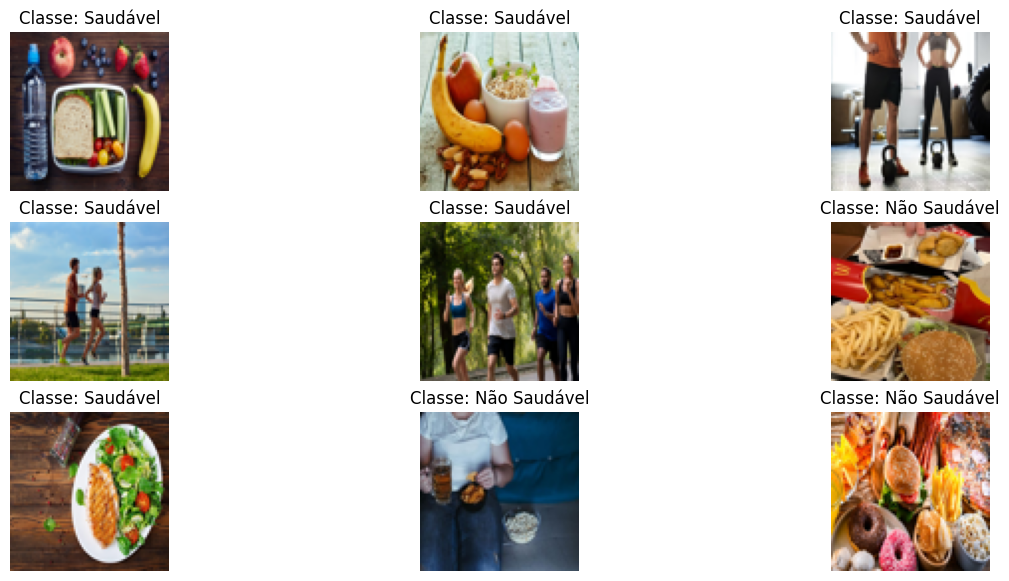


------------------------------------------------------------------

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7846 - accuracy: 0.2857 - val_loss: 0.7445 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 173ms/step - loss: 0.5068 - accuracy: 0.7143 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 175ms/step - loss: 0.9035 - accuracy: 0.7143 - val_loss: 1.1136 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 182ms/step - loss: 0.6811 - accuracy: 0.7143 - val_loss: 0.9678 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 159ms/step - loss: 0.5825 - accuracy: 0.7143 - val_loss: 0.8644 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 179ms/step - loss: 0.4694 - accuracy: 0.7143 - val_loss: 0.9140 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 185ms/step - loss: 0.6446 - accuracy: 0.4

In [19]:
# Importando bibliotecas necessárias
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import math

# Lista de caminhos das imagens
caminhos_imagens = [
    "/content/AcademiaSaudavel.jpg",
    "/content/ComidaSaudavel2.jpg",
    "/content/ExercicioSaudavel.jpeg",
    "/content/ExercicioSaudavel2.jpg",
    "/content/comidasaudavel3.jpg",
    "/content/comidasaudavel.jpg",
    "/content/ComidaRuim2.jpg",
    "/content/ComidaRuim.jpg",
    "/content/sedentario.jpg"
]

# Função para carregar e redimensionar imagens
def carregar_imagens(caminhos, tamanho_alvo=(80, 80)):
    imagens = []
    rotulos = []

    for caminho_imagem in caminhos:
        # Carregar imagem e redimensionar
        img = Image.open(caminho_imagem)
        img = img.resize(tamanho_alvo)

        # Converter imagem para array numpy
        img_array = np.array(img)

        # Adicionar imagem e rótulo à lista
        imagens.append(img_array)

        # Ajustar a lógica de atribuição de rótulos
        rotulo = 1 if "saudavel" in caminho_imagem.lower() else 0
        rotulos.append(rotulo)

    return np.array(imagens), np.array(rotulos)

# Carregar imagens
X, y = carregar_imagens(caminhos_imagens)

# Embaralhar os dados
indices_embaralhados = np.arange(len(X))
np.random.shuffle(indices_embaralhados)

# Aplicar o embaralhamento aos dados
X = X[indices_embaralhados]
y = y[indices_embaralhados]

# Pré-processamento
X = X.astype('float32') / 255  # Normalizando as imagens para o intervalo [0, 1]

# Convertendo as labels para o formato apropriado
num_classes = 2
y = to_categorical(y, num_classes)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando algumas imagens
plt.figure(figsize=(15, 7))
for i in range(len(caminhos_imagens)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title('Classe: {}'.format('Saudável' if y[i][1] == 1 else 'Não Saudável'))
    plt.axis('off')

# Informações sobre o conjunto de dados
print("Número de amostras no conjunto de imagens:", len(X))
print("Tamanho das imagens:", X[0].shape)
print("Número de classes:", len(np.unique(y)))

print("")
print("------------------------------------------------------------------")
print("")

plt.show()

print("")
print("------------------------------------------------------------------")
print("")

# Aumento de Dados
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Calcular o valor apropriado
batch_size = 32
steps_per_epoch = math.ceil(len(X_train) / batch_size)

# Criando o modelo com Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento com aumento de dados
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Treinando o modelo sem aumento de dados
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

print("")
print("------------------------------------------------------------------")
print("")

# Avaliando o modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Acurácia no conjunto de teste:', test_acc)


In [ ]:
#Identificação do Problema (20 pts):
#O problema abordado é a classificação de imagens entre "saudável" e "não saudável". Garantir condições ideais para análise e interpretação de dados visuais é crucial para obter insights significativos sobre o impacto de diferentes classes de imagens relacionadas à saúde.
#
#Solução Proposta (20 pts):
#A solução proposta envolve o uso de uma Convolutional Neural Network (CNN) para a classificação de imagens. A implementação utiliza a biblioteca TensorFlow e a API Keras. As imagens são pré-processadas, normalizadas e divididas em conjuntos de treinamento e teste. Além disso, é aplicado aumento de dados usando a classe ImageDataGenerator para melhorar a generalização do modelo. A CNN é projetada com camadas convolucionais, de pooling e totalmente conectadas, incluindo camadas de dropout para mitigar o overfitting.
#
#Resultados Esperados e Impacto (20 pts):
#Os resultados esperados incluem a obtenção de um modelo treinado com boa precisão na classificação de imagens saudáveis e não saudáveis. O impacto positivo almejado é a capacidade do modelo em generalizar para novos dados e fornecer uma ferramenta eficaz para a identificação visual de padrões relacionados à saúde nas imagens.
#
#README (20 pts):
#O README pode ser estruturado da seguinte forma:
#
#Descrição do Projeto:
#Breve introdução ao problema abordado e à solução proposta.
#Instruções de Uso:
#Passos para executar o código.
#Requisitos e dependências.
#Informações do Projeto:
#Detalhes sobre o conjunto de dados.
#Explicação do pré-processamento.
#Arquitetura do Modelo:
#Descrição das camadas da CNN.
#Justificativa para o uso de dropout.
#Treinamento do Modelo:
#Explicação do treinamento com e sem aumento de dados.
#Detalhes sobre o uso de ImageDataGenerator.
#Avaliação do Modelo:
#Como avaliar a acurácia do modelo no conjunto de teste.
#O README deve ser claro, conciso e informativo, facilitando o entendimento e a replicação do projeto por outros desenvolvedores.